In [1]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 882.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 926.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 777.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 683.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 734.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 498.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 634.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 377.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 751.9 kB/s eta 0:00:00


In [2]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00


In [3]:
import torch
print(torch.__version__)

2.2.1+cu121


In [4]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.1+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.1/508.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.0/770.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 14.7 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.nn.models import Node2Vec
from sklearn.metrics import accuracy_score
from torch_geometric.datasets import Actor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv, Linear, SAGEConv
from torch.nn.functional import dropout
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

In [6]:
from tqdm import tqdm
from torch.optim import SparseAdam

#Node2Vec
Exercise 1

Train function for Node2Vec model

In [7]:
def train(model, epochs=8, batch_size=32, lr=0.01, device='cpu'):
    model = model.to(device)

    loader = model.loader(batch_size=batch_size, shuffle=True, num_workers=1)

    optimizer = SparseAdam(list(model.parameters()), lr=lr)

    model.train()

    for epoch in range(epochs):
        train_loss = 0

        for pos_rw, neg_rw in tqdm(loader):
            optimizer.zero_grad()

            loss = model.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()

            optimizer.step()

            train_loss += loss.item()

        train_loss = train_loss / len(loader)

        print(f'Epoch: {epoch:02d}, Loss: {train_loss:.4f}')

Training Node2Vec model

In [8]:
data = Actor('../data')
dataset = data[0]

model = Node2Vec(dataset.edge_index,
                  embedding_dim=50,
                  walk_length=30,
                  context_size=10,
                  walks_per_node=20,
                  num_negative_samples=1,
                  p=200, q=1,
                  sparse=True)

train(model)

Processing...
Done!
100%|██████████| 238/238 [01:21<00:00,  2.93it/s]


Epoch: 00, Loss: 2.1199


100%|██████████| 238/238 [01:01<00:00,  3.90it/s]


Epoch: 01, Loss: 0.9452


100%|██████████| 238/238 [01:32<00:00,  2.58it/s]


Epoch: 02, Loss: 0.8560


100%|██████████| 238/238 [01:19<00:00,  3.00it/s]


Epoch: 03, Loss: 0.8370


100%|██████████| 238/238 [01:15<00:00,  3.15it/s]


Epoch: 04, Loss: 0.8287


100%|██████████| 238/238 [01:10<00:00,  3.36it/s]


Epoch: 05, Loss: 0.8248


100%|██████████| 238/238 [01:05<00:00,  3.61it/s]


Epoch: 06, Loss: 0.8221


100%|██████████| 238/238 [01:16<00:00,  3.12it/s]

Epoch: 07, Loss: 0.8204


In [9]:
labels = dataset.y.detach().cpu().numpy()
node_embeddings = model().detach().cpu().numpy()

train_x, test_x, train_y, test_y = train_test_split(node_embeddings, labels,
                                                    test_size=0.1,
                                                    stratify=labels)

In [10]:
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(train_x, train_y)

preds = classifier.predict(test_x)

Results for Node2Vec

In [11]:
from sklearn.metrics import classification_report
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.14      0.01      0.02        85
           1       0.20      0.12      0.15       134
           2       0.20      0.22      0.21       163
           3       0.22      0.27      0.24       181
           4       0.27      0.37      0.31       197

    accuracy                           0.23       760
   macro avg       0.20      0.20      0.19       760
weighted avg       0.21      0.23      0.21       760



Data Visualization with t-SNE for Dimensionality Reduction

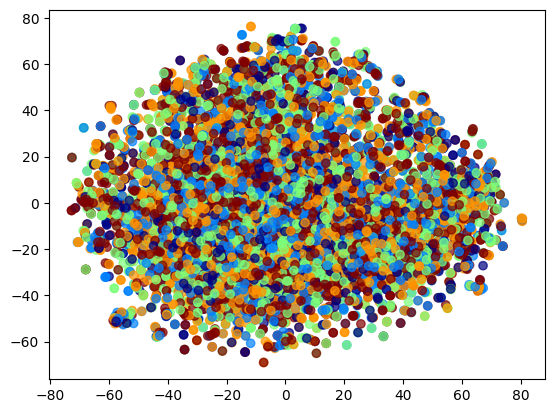

In [12]:
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)
plt.show()

#GraphSAGE
Exercise 2

Train function for GraphSAGE model

In [13]:
def train_GSModel(model, dataset, optimizer, criterion, epochs=5):
    if len(dataset.train_mask.shape) > 1:
        train_mask = dataset.train_mask[:, 0]
    else:
        train_mask = dataset.train_mask

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(dataset.x, dataset.edge_index)
        loss = criterion(out[train_mask],
                         dataset.y[train_mask])
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

PyTorch Graph Neural Network (GNN) Implementation

In [14]:
class SAGE(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv1 = SAGEConv(-1, 128)
        self.conv2 = SAGEConv(-1, 256)
        # self.conv3 = SAGEConv(-1, 512)

        # self.linear1 = Linear(64, 128)
        # self.linear2 = Linear(512, 256)
        self.linear3 = Linear(256, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).tanh()
        x = dropout(x, p=0.5)

        x = self.conv2(x, edge_index).tanh()
        x = dropout(x, p=0.5)

        # x = self.conv3(x, edge_index).tanh()
        # x = dropout(x, p=0.5)

        # x = self.linear1(x).tanh()
        # x = dropout(x, p=0.20)

        # x = self.linear2(x).tanh()
        # x = dropout(x, p=0.5)

        x = self.linear3(x)

        return x

In [15]:
model2 = SAGE(num_classes=5)

optimizer = Adam(model2.parameters(), lr=0.01)
criterion = CrossEntropyLoss()

GraphSAGE model training

In [23]:
import torch.nn.functional as F
import numpy as np

In [38]:
train_GSModel(model2, dataset, optimizer, criterion, 1000)

Epoch: 000, Loss: 0.1109
Epoch: 001, Loss: 0.1076
Epoch: 002, Loss: 0.1151
Epoch: 003, Loss: 0.1104
Epoch: 004, Loss: 0.1127
Epoch: 005, Loss: 0.1098
Epoch: 006, Loss: 0.1061
Epoch: 007, Loss: 0.1029
Epoch: 008, Loss: 0.1098
Epoch: 009, Loss: 0.1102
Epoch: 010, Loss: 0.1094
Epoch: 011, Loss: 0.1063
Epoch: 012, Loss: 0.1068
Epoch: 013, Loss: 0.1029
Epoch: 014, Loss: 0.1061
Epoch: 015, Loss: 0.1056
Epoch: 016, Loss: 0.1000
Epoch: 017, Loss: 0.1150
Epoch: 018, Loss: 0.1121
Epoch: 019, Loss: 0.1121
Epoch: 020, Loss: 0.1097
Epoch: 021, Loss: 0.1077
Epoch: 022, Loss: 0.1075
Epoch: 023, Loss: 0.1093
Epoch: 024, Loss: 0.1110
Epoch: 025, Loss: 0.1049
Epoch: 026, Loss: 0.1160
Epoch: 027, Loss: 0.1089
Epoch: 028, Loss: 0.1100
Epoch: 029, Loss: 0.1158
Epoch: 030, Loss: 0.1056
Epoch: 031, Loss: 0.1144
Epoch: 032, Loss: 0.1104
Epoch: 033, Loss: 0.1154
Epoch: 034, Loss: 0.1065
Epoch: 035, Loss: 0.1074
Epoch: 036, Loss: 0.1127
Epoch: 037, Loss: 0.1135
Epoch: 038, Loss: 0.1178
Epoch: 039, Loss: 0.1010


GraphSAGE model results

In [51]:
model2.eval()
with torch.inference_mode():

    logits = model2(dataset.x, dataset.edge_index).detach().cpu().numpy()

    logits_softmax = F.softmax(torch.tensor(logits), dim=1).numpy()

    predicted_labels = np.argmax(logits_softmax, axis=1)

    acc_score = accuracy_score(predicted_labels[dataset.test_mask[:, 0]], dataset.y[dataset.test_mask[:, 0]].numpy())
    #so acc na cel dataset dava pogolema tochnost

    print(f'Accuracy score:{acc_score: .4f}')

Accuracy score: 0.2914


Data Visualization with t-SNE after model evaluation

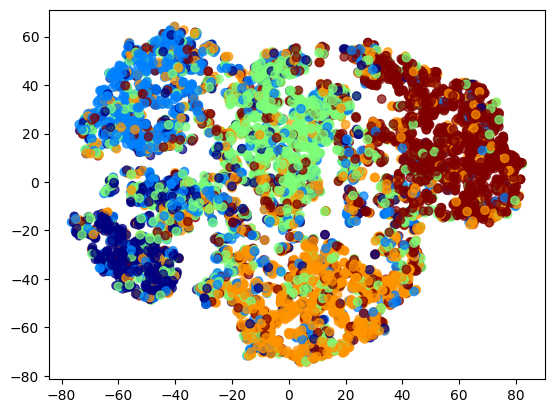

In [52]:
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(logits)

plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)
plt.show()